In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the libraries required
import pandas as pd
import numpy as np

#importing the dataset
train=pd.read_csv("/content/drive/My Drive/BigMart_dataset/Walmart_Train.csv",na_values={"Item_Visibility":[0]})

print("printing the train dataset")
train.head(5)



test=pd.read_csv("/content/drive/My Drive/BigMart_dataset/Test.csv",na_values={"Item_Visibility":[0]})


print("printing the test dataset")
test.head(5)




printing the train dataset
printing the test dataset


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
#merging the dataset

train['source']='train'

test['source']='test'

data=pd.concat([train,test],ignore_index=True, sort= False)

In [ ]:
#the one thing we have to focus is item_outlet_Sales


discpt=data.describe()
print(discpt)

        Item_Weight  ...  Item_Outlet_Sales
count  11765.000000  ...        8523.000000
mean      12.792854  ...        2181.288914
std        4.652502  ...        1706.499616
min        4.555000  ...          33.290000
25%        8.710000  ...         834.247400
50%       12.600000  ...        1794.331000
75%       16.750000  ...        3101.296400
max       21.350000  ...       13086.964800

[8 rows x 5 columns]


In [ ]:
#Lets find out how many  zero'es values are

nan_descript=data.apply(lambda x: sum(x.isnull()))

print(nan_descript)

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility               879
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64


In [ ]:
#Now lets find out the unique values in each of the catogorical columns

uniq=data.apply(lambda x: len(x.unique()))

print(uniq)

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64


In [ ]:
#let do grouping in each catogorical columns

col=["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Size"]

for i in col:
    print("The frequency distribution of each catogorical columns is--" + i+"\n")
    print(data[i].value_counts())  

The frequency distribution of each catogorical columns is--Item_Fat_Content

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
The frequency distribution of each catogorical columns is--Item_Type

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
The frequency distribution of each catogorical columns is--Outlet_Location_Type

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
The frequency distribution of each catogorical columns is--

In [ ]:
#Replacing the minimum nan values in the Item_Weight with its mean value

data.fillna({"Item_Weight":data["Item_Weight"].mean()},inplace=True)

In [ ]:
#checking the current status of  nan values in the dataframe
nan_descript=data.apply(lambda x: sum(x.isnull()))

In [ ]:
#Now we have 0 nan valuesin Item_Weight


data["Outlet_Size"].fillna(method="ffill",inplace=True)


nan_descript=data.apply(lambda x: sum(x.isnull()))


In [ ]:
#Now working on the item_visibility


visibilty_avg=data.pivot_table(values="Item_Visibility",index="Item_Identifier")


itm_visi=data.groupby('Item_Type')

data_frames=[]
for item,item_df in itm_visi:
    data_frames.append(itm_visi.get_group(item))
for i in data_frames:
    i["Item_Visibility"].fillna(value=i["Item_Visibility"].mean(),inplace=True)
    i["Item_Outlet_Sales"].fillna(value=i["Item_Outlet_Sales"].mean(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [ ]:
new_data=pd.concat(data_frames)

print(new_data)

nan_descript=new_data.apply(lambda x: sum(x.isnull()))

print(nan_descript)

      Item_Identifier  Item_Weight  ... Item_Outlet_Sales  source
5               FDP36    10.395000  ...        556.608800   train
21              FDW12    12.792854  ...       4064.043200   train
23              FDC37    12.792854  ...        214.387600   train
48              FDL12    15.850000  ...       2576.646000   train
71              FDL12    15.850000  ...        599.220000   train
77              FDN48    12.792854  ...        643.162800   train
84              FDR12    12.792854  ...       3091.975200   train
106             FDA47    10.500000  ...       1794.331000   train
107             FDG12     6.635000  ...       2530.705800   train
156             FDB36     5.465000  ...        262.325200   train
179             FDO24    11.100000  ...       3010.747600   train
184             FDT12    12.792854  ...       4739.830200   train
201             FDE36     5.260000  ...       3275.736000   train
203             FDI24    12.792854  ...       6704.606000   train
205       

In [ ]:
#Now we have successfully cleaned our complete dataset.
new_data["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

new_data["Item_Fat_Content"].value_counts()

new_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
5,FDP36,10.395000,Regular,0.073297,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
21,FDW12,12.792854,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,train
23,FDC37,12.792854,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,train
48,FDL12,15.850000,Regular,0.121633,Baking Goods,60.6220,OUT046,1997,Small,Tier 1,Supermarket Type1,2576.6460,train
71,FDL12,15.850000,Regular,0.121532,Baking Goods,59.2220,OUT013,1987,High,Tier 3,Supermarket Type1,599.2200,train


In [ ]:
#Implementing one-hot-Coding method for getting the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data=new_data
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type'])


In [ ]:
#Exporting the datas

train = data.loc[data['source']=="train"]

test = data.loc[data['source']=="test"]

In [ ]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
#here we are droping the "Item_Outlet_Sales because this only we want to be predicted from the model that we are going to built
train.drop(['source'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
#Export files as modified versions:
train.to_csv("/content/drive/My Drive/BigMart_dataset/train_modified.csv",index=False)
test.to_csv("/content/drive/My Drive/BigMart_dataset/test_modified.csv",index=False)


In [ ]:
#Let's start building the baseline model as  it is non -predicting model and also commenly known as informed guess

#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
#Export submission file
base1.to_csv("alg0.csv",index=False)


In [ ]:
'''Very Important Note for creating baseline model
making baseline models helps in setting a benchmark. 
If your predictive algorithm is below this, there is something going seriously wrong and 
we  should check your data.'''

#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

print(target)


Item_Outlet_Sales


In [ ]:
''' Now from this I have to learn machine learning data_Analytics'''
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)
    


Model Report
RMSE : 1059
CV Score : Mean - 1090 | Std - 74.92 | Min - 932.5 | Max - 1266


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Model has been successfully created and trained. The predicted result is in alg3.csv


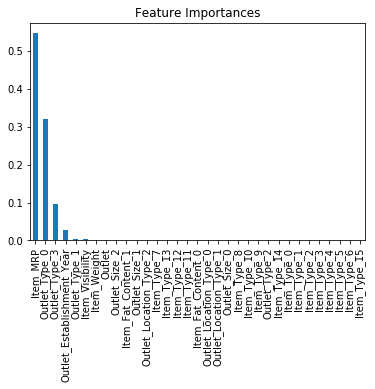

In [ ]:
# Decision Tree Model

from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

print("Model has been successfully created and trained. The predicted result is in alg3.csv")



Model Report
RMSE : 1068
CV Score : Mean - 1093 | Std - 77.02 | Min - 931.8 | Max - 1268
Model has been successfully created and trained. The predicted result is in alg3.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


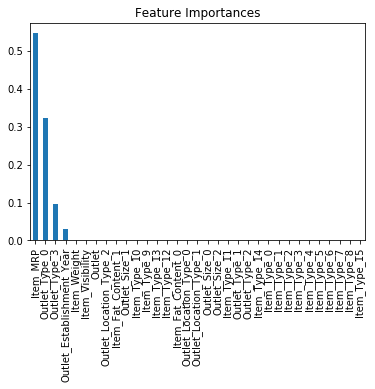

In [ ]:
# Decision Tree Model

from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

print("Model has been successfully created and trained. The predicted result is in alg3.csv")

In [ ]:
predictors = ['Item_MRP','Item_Visibility_MeanRatio','Outlet_5','Outlet_Type_3']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

NameError: ignored

Creating the models and processing

Model Report
RMSE : 1128
CV Score : Mean - 1.543e+15 | Std - 5.879e+15 | Min - 1007 | Max - 2.704e+16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


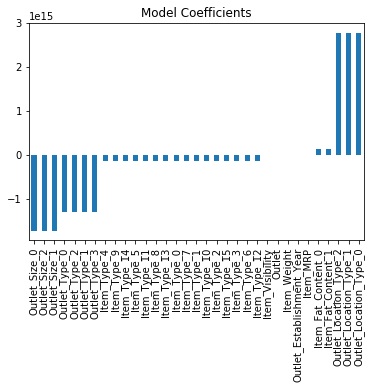

In [ ]:
#Liner Regression model
print("Creating the models and processing")
from sklearn.linear_model import LinearRegression, Ridge
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')